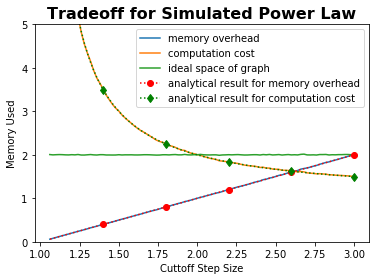

<Figure size 432x288 with 0 Axes>

In [7]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline


def cost_powers_k(rv, k = 2):
    assert(k!=1)
    assert(rv>0)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,time_cost,rv)

def sum_pair_costs(sim, n,verbose = True):
    sum1,sq_sum1,sum2,sq_sum2,sum3,sq_sum3 = reduce(lambda x,y : (x[0]+y[0], x[1]+y[0]**2,\
                                                     x[2]+y[1], x[3]+y[1]**2,\
                                                     x[4]+y[2], x[5]+y[2]**2),\
                                        sim.sample_repeated(n),(0,0,0,0,0,0))
    if verbose:
        print("confidence for space complexity")
        MC.Calculate_ConfIntv(sum1,sq_sum1,n,.99)
        print("confidence for time complexity")
        MC.Calculate_ConfIntv(sum2,sq_sum2,n,.99)
    return (sum1/n, sq_sum1/n, sum2/n, sq_sum2/n,sum3/n,sq_sum3/n)

alpha = -3
xmin = 1
n = 1000000
inv_f = lambda x : MC.inverse_continuous_power_law(x,xmin,alpha)
rv = MC.RandomVariable(inv_f,"power law, alpha = -3, for x > 1",discrete = False,verbose = False)
X  = []
Y1 = []
Y2 = []
Y3 = []
Y4 = []
Y5 = []

for j in range(98):
    i = 3-j/50
    #print ("i = {}".format(i))
    cost_f = lambda x : cost_powers_k(x,i)
    Sim = MC.Simulator(rv,cost_f,'Live-Graph', verbose = False)
    y1, _, y2, _, y3, _ = sum_pair_costs(Sim, n, verbose = False)
    X.append(i)
    Y1.append(y1)
    Y2.append(y2)
    Y3.append(y3)
    Y4.append(i-1)
    Y5.append(i/(i-1))
plt.plot(X,Y1,label = "memory overhead")
plt.plot(X,Y2,label = "computation cost")
plt.plot(X,Y3,label = "ideal space of graph")
plt.plot(X,Y4,'ro:',markevery = 20, label = "analytical result for memory overhead")
plt.plot(X,Y5,'gd:',markevery = 20, label = "analytical result for computation cost")
plt.ylim(0,5)
# Add legend
plt.legend(loc='upper right')
# Add title and x, y labels
plt.title("Tradeoff for Simulated Power Law", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Size")
plt.ylabel("Memory Used")
plt.show()
plt.savefig('results/continuous_fig.png')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

n = 200000
X = []
Y1 = []
Y2 = []
for j in range(20):
    i = 2.1-j/100
    inv_f = lambda x : MC.inverse_continuous_power_law(x,1,-3)
    cost_f = lambda x : cost_powers_k(x,i)
    print ("i = {}".format(i))
    rv = MC.RandomVariable(inv_f,"power law, alpha = -2, for x > 1",discrete = False,verbose = False)
    Sim = MC.Simulator(rv,cost_f,'Live-Graph', verbose = False)
    y1, _, y2, _ = sum_pair_costs(Sim,n, verbose = False)
    X.append(i)
    Y1.append(y1)
    Y2.append(y2)
plt.plot(X,Y1,label = 'memory cost')
plt.plot(X,Y2,label = "computation cost")
# Add legend
plt.legend(loc='lower left')
# Add title and x, y labels
plt.title("Tradeoff for LiveGraph", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Step Size")
plt.ylabel("Memory Used")
plt.show()


i = 2.1


TypeError: can't convert complex to float

In [2]:
list(rv.sample_repeated(30))


[1.083252381762769,
 1.7349162208624411,
 1.3942274252629856,
 2.069801004404356,
 6.029046862265378,
 3.0976483044882217,
 4.579210663149215,
 2.942813474772894,
 2.4364700500027348,
 1.284002163344647,
 7.855345361134659,
 1.7830378232579707,
 41.00886171263382,
 1.6537735422204558,
 13.876210940406034,
 1.7728931320419783,
 45.180824174917305,
 1.8048575397568634,
 1.2075960366045733,
 17.09126893552623,
 1.9811301806659756,
 1.0333977872721942,
 2.0112199519491214,
 1.8986328885561838,
 1.9894934254682752,
 3.732801691911297,
 1.5250003730451478,
 9.297905864925529,
 2.7695641044742727,
 2.566254102238532]

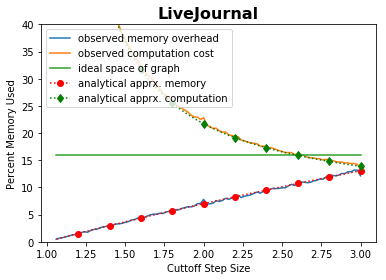

<Figure size 432x288 with 0 Axes>

In [14]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline


def cost_powers_k(rv, k = 2):
    assert(k!=1)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,time_cost,rv)

def sum_pair_costs(iterator, n,verbose = True):
    sum1,sum2,sum3 = reduce(lambda x,y : (x[0]+y[0],x[1]+y[1],x[2]+y[2]),\
                                        iterator,(0,0,0))
    return (sum1/n,sum2/n,sum3/n)

def my_iter(i,my_list):
    for x in my_list:
        yield cost_powers_k(x,i)

val_array = []
n = 0
with open('data/soc-LiveJournal1counts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        n+=i
        while (i>0):
            i-=1
            val_array.append(a)

X  = []
Y1 = []
Y2 = []
Y3 = []
Y4 = []
Y5 = []

a = 2.068
Memory = lambda a : lambda x : (x-1)/(1-x**(2-a)) + 1/(2-a)
Computation = lambda a : lambda x : 1/(1-x**(2-a))


for j in range(98):
    i = 3-j/50
    #print ("i = {}".format(i))

    cost_f = lambda x : cost_powers_k(x,i)
    y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
    X.append(i)
    Y1.append(y1)
    Y2.append(y2)
    Y3.append(y3)
    Y4.append(Memory(a)(i))
    Y5.append(Computation(a)(i))
plt.plot(X,Y1,label = "observed memory overhead")
plt.plot(X,Y2,label = "observed computation cost")
plt.plot(X,Y3,label = "ideal space of graph")
plt.plot(X,Y4,'ro:',markevery = 10,label = "analytical apprx. memory")
plt.plot(X,Y5,'gd:',markevery = 10,label = "analytical apprx. computation")
plt.ylim(0,40)
# Add legend
plt.legend(loc='upper right')
# Add title and x, y labels
plt.title("LiveJournal", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Size")
plt.ylabel("Percent Memory Used")
plt.show()
plt.savefig('results/livejournal.png')

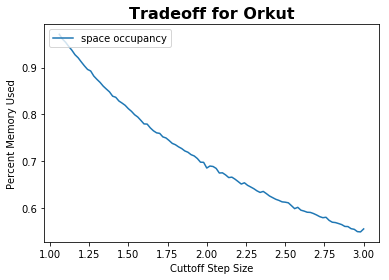

<Figure size 432x288 with 0 Axes>

In [11]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline


def cost_powers_k(rv, k = 2):
    assert(k!=1)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,rv)

def sum_pair_costs(iterator, n,verbose = True):
    sum1,sum2 = reduce(lambda x,y : (x[0]+y[0],x[1]+y[1]),\
                                        iterator,(0,0))
    return (sum1/n,sum2/n)

def my_iter(i,my_list):
    for x in my_list:
        yield cost_powers_k(x,i)

val_array = []
n = 0
with open('data/com-orkut.ungraphcounts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        n+=i
        while (i>0):
            i-=1
            val_array.append(a)

X  = []
Y1 = []

for j in range(98):
    i = 3-j/50
    #print ("i = {}".format(i))

    cost_f = lambda x : cost_powers_k(x,i)
    y1, y2 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
    X.append(i)
    Y1.append(y2/(y1+y2))
plt.plot(X,Y1,label = "space occupancy")
#plt.ylim(0,300)
# Add legend
plt.legend(loc='upper left')
# Add title and x, y labels
plt.title("Tradeoff for Orkut", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Size")
plt.ylabel("Percent Memory Used")
plt.show()
plt.savefig('results/comungraph_.png')

In [ ]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline


def cost_powers_k(rv, k = 2):
    assert(k!=1) 
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,time_cost,rv)

def sum_pair_costs(sim, n,verbose = True):
    sum1,sq_sum1,sum2,sq_sum2,sum3,sq_sum3 = reduce(lambda x,y : (x[0]+y[0], x[1]+y[0]**2,\
                                                     x[2]+y[1], x[3]+y[1]**2,\
                                                     x[4]+y[2], x[5]+y[2]**2),\
                                        sim.sample_repeated(n),(0,0,0,0,0,0))
    if verbose:
        print("confidence for space complexity")
        MC.Calculate_ConfIntv(sum1,sq_sum1,n,.99)
        print("confidence for time complexity")
        MC.Calculate_ConfIntv(sum2,sq_sum2,n,.99)
    return (sum1/n, sq_sum1/n, sum2/n, sq_sum2/n,sum3/n,sq_sum3/n)

alpha = -2
xmin = 1
n = 10000
inv_f = lambda x : MC.inverse_continuous_power_law(x,xmin,alpha)
rv = MC.RandomVariable(inv_f,"power law, alpha = -2, for x > 1",discrete = False,verbose = False)
X  = []
Y1 = []
Y2 = []
Y3 = []

for j in range(98):
    i = 3-j/50
    #print ("i = {}".format(i))
    cost_f = lambda x : cost_powers_k(x,i)
    Sim = MC.Simulator(rv,cost_f,'Live-Graph', verbose = False)
    y1, _, y2, _, y3, _ = sum_pair_costs(Sim, n, verbose = False)
    X.append(i)
    Y1.append(y3/(y1+y3))
    Y2.append(y2)
    Y3.append(y3)
plt.plot(X,Y1,label = "occupancy")
plt.plot(X,Y2,label = "computation cost")
plt.plot(X,Y3,label = "ideal space of graph")
#plt.ylim(0,300)
# Add legend
plt.legend(loc='upper left')
# Add title and x, y labels
plt.title("Tradeoff for LiveGraph", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Size")
plt.ylabel("Memory Used")
plt.show()
plt.savefig('results/continuous_fig.png')

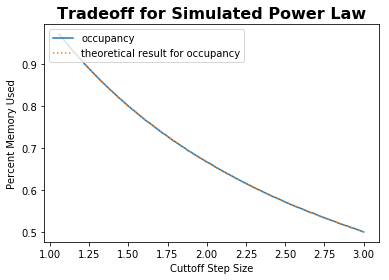

<Figure size 432x288 with 0 Axes>

In [5]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline


def cost_powers_k(rv, k = 2):
    assert(k!=1)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,rv)

def sum_pair_costs(sim, n,verbose = True):
    sum1,sum2 = reduce(lambda x,y : (x[0]+y[0],x[1]+y[1]),\
                                        sim.sample_repeated(n),(0,0))
    return (sum1/n,sum2/n)

def my_iter(i,my_list):
    for x in my_list:
        yield cost_powers_k(x,i)

val_array = []
n = 0
with open('data/com-orkut.ungraphcounts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        n+=i
        while (i>0):
            i-=1
            val_array.append(a)

alpha = -3
xmin = 1
n = 1000000
inv_f = lambda x : MC.inverse_continuous_power_law(x,xmin,alpha)
rv = MC.RandomVariable(inv_f,"power law, alpha = -2, for x > 1",discrete = False,verbose = False)
X  = []
Y1 = []
Y2 = []

for j in range(98):
    i = 3-j/50
    #print ("i = {}".format(i))
    cost_f = lambda x : cost_powers_k(x,i)
    Sim = MC.Simulator(rv,cost_f,'Live-Graph', verbose = False)
    y1,y2= sum_pair_costs(Sim, n, verbose = False)
    X.append(i)
    Y1.append(y2/(y1+y2))
    Y2.append(2/(i+1))
plt.plot(X,Y1,label = "occupancy")
plt.plot(X,Y2, linestyle = ':',label = "theoretical result for occupancy")
#plt.ylim(0,300)
# Add legend
plt.legend(loc='upper left')
# Add title and x, y labels
plt.title("Tradeoff for Simulated Power Law", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Size")
plt.ylabel("Percent Memory Used")
plt.show()
plt.savefig('results/continuous_fig3.png')

In [19]:
# Check the analytic solution
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

# Define the expression whose roots we want to find

alpha = -3
beta = .2

recurance_relationship = lambda p1,p2 : lambda p3: beta*p3**(alpha+1)/(alpha+1)-p3*p2**(alpha)  -\
                            (1-beta)*p2**(alpha+1)-p1**(alpha+1)/(alpha+1) + beta*(p1*p2**(alpha))
initial_condition = lambda p1: lambda p2: beta*p2**(alpha+1)/(alpha+1) - p2*p1**(alpha) - (1-beta)*p1**(alpha+1)-1.0/(alpha+1)


p1 = 1
func = initial_condition(p1)
initial_guess = 1.0/beta
p2 = fsolve(func, initial_guess)[0]
cutoffList = [p1,p2]

for i in range(10):
    func = recurance_relationship(p1,p2)
    initial_guess = p2/beta
    p3 = fsolve(func,initial_guess)[0]
    cutoffList.append(p3)
    p1 = p2
    p2 = p3


print (cutoffList)

[1, -0.5886211907610405, 0.6216920639901612, -0.4107450841611377, 0.40544312290349055, -0.2888583635120118, 0.2715504250230183, -0.20341401209305082, 0.18465506359352585, -0.1430791689687923, 0.12669173223907212, -0.10045438149476393]


In [2]:
for i in rv.sample_repeated(100):
    print (i)

4.776438070570497
3.924489447664993
1.143068781106602
1.3310944155351747
1.29660897918822
1.142550589876434
1.2782463094905774
1.1437121232152672
1.694004382772716
5.170089893947461
1.2987604142028595
1.5811827910806378
1.2929864848739887
1.685503827897292
1.0710872740923636
1.0035333553507677
2.6032352724067387
1.6785279197266605
1.743578845417088
1.0174832258633775
2.0257360147516263
1.3855410293868535
5.738900820729275
1.120073372597268
1.3171303650711665
1.2272701878697099
2.7053410783948917
1.2262666391558266
1.0140944390791349
2.6197408358142744
1.3420181651522194
1.400032634757631
1.1888251407298303
2.4789957646768284
1.3919630976887805
1.0353230957166932
1.556300950280588
1.2011745170583883
2.133997194533805
2.365024759661528
3.1897983486759793
3.340958275791699
1.1380316514934712
1.0514024892945206
1.6921525630014111
1.0759982432654331
1.5147501616060002
1.0405190469082903
1.5437966570574022
1.4299839456811205
1.0413653403200598
2.3611512735907314
1.5622283647996595
1.35315400

1.4571213417137991


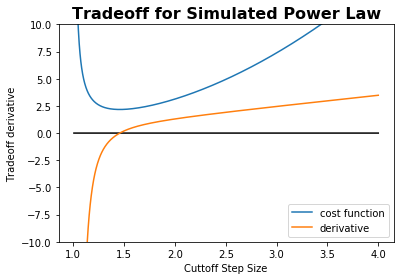

<Figure size 432x288 with 0 Axes>

In [16]:
# Check the analytic solution
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve
%matplotlib inline

# Define the expression whose roots we want to find

alpha = -3
beta = .2

reduced_derivative = lambda x : 2-2*x\
                        + (beta*(alpha+1)*(alpha+2)-(alpha+2))*x**(alpha+1)\
                        + 2*(alpha+1)*x**(alpha+2)\
                        -(alpha)*x**(alpha+3)
derivative = lambda x : (\
                         2-2*x \
                         +(beta*(alpha+1)*(alpha+2)-(alpha+2))*x**(alpha+1)\
                         + 2*(alpha+1)*x**(alpha+2)\
                         -(alpha)*x**(alpha+3)\
                        )/((alpha+1)*(x**(alpha+2)-1)**2)
cost_function = lambda x : beta/(1-x**(alpha+2)) + (x-1)**2/((alpha+1)*(x**(alpha+2)-1))
cost_function_scaled = lambda x : math.sqrt(beta)/(1-x**(alpha+2)) + (x-1)**2/((alpha+1)*(x**(alpha+2)-1))/math.sqrt(beta)



initial_guess = 2.0
result = fsolve(reduced_derivative, initial_guess)[0]

print (result)

X  = []
Y1 = []
Y2 = []
Y3 = []

for j in range(1498):
    i = 4-j/500
    #print ("i = {}".format(i))
    X.append(i)
    Y1.append(derivative(i))
    Y2.append(0)
    Y3.append(cost_function_scaled(i))
plt.plot(X,Y2,color = "black")
plt.plot(X,Y3,label = "cost function")
plt.plot(X,Y1,label = "derivative")
# Add legend
plt.legend(loc='lower right')
# Add title and x, y labels
plt.ylim(-10,10)
plt.title("Tradeoff for Simulated Power Law", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Size")
plt.ylabel("Tradeoff derivative")
plt.show()
plt.savefig('results/trade_off_derivative.png')

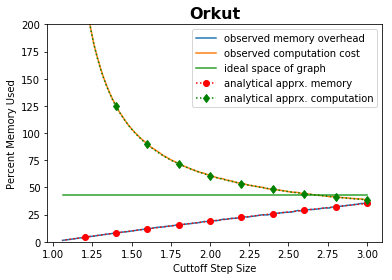

<Figure size 432x288 with 0 Axes>

In [22]:
import importlib
resources = importlib.import_module("resources")
import resources.MonteCarlo as MC

import numpy as np
import pandas as pd
import math
from functools import reduce
import random
random.seed(2010)

import matplotlib.pyplot as plt
%matplotlib inline


def cost_powers_k(rv, k = 2):
    assert(k!=1)
    if k == 2:
        cutoff = 1<<(int(rv)).bit_length()
    else:
        cutoff = k**(math.ceil(math.log(rv, k)))
    space_cost = cutoff-rv
    time_cost = (cutoff - 1)*1.0/(k-1)
    return (space_cost,time_cost,rv)

def sum_pair_costs(iterator, n,verbose = True):
    sum1,sum2,sum3 = reduce(lambda x,y : (x[0]+y[0],x[1]+y[1],x[2]+y[2]),\
                                        iterator,(0,0,0))
    return (sum1/n,sum2/n,sum3/n)

def my_iter(i,my_list):
    for x in my_list:
        yield cost_powers_k(x,i)

val_array = []
n = 0
with open('data/com-orkut.ungraphcounts.txt','r') as f:
    for line in f:
        v1,v2 = line.split(',')
        i = int(v2)
        a = int(v1)
        if a<1:
            continue
        n+=i
        while (i>0):
            i-=1
            val_array.append(a)

X  = []
Y1 = []
Y2 = []
Y3 = []
Y4 = []
Y5 = []

a = 2.0239
Memory = lambda a : lambda x : (x-1)/(1-x**(2-a)) + 1/(2-a)
Computation = lambda a : lambda x : 1/(1-x**(2-a))


for j in range(98):
    i = 3-j/50
    #print ("i = {}".format(i))

    cost_f = lambda x : cost_powers_k(x,i)
    y1, y2, y3 = sum_pair_costs(my_iter(i,val_array), n, verbose = False)
    X.append(i)
    Y1.append(y1)
    Y2.append(y2)
    Y3.append(y3)
    Y4.append(Memory(a)(i))
    Y5.append(Computation(a)(i))
plt.plot(X,Y1,label = "observed memory overhead")
plt.plot(X,Y2,label = "observed computation cost")
plt.plot(X,Y3,label = "ideal space of graph")
plt.plot(X,Y4,'ro:',markevery = 10,label = "analytical apprx. memory")
plt.plot(X,Y5,'gd:',markevery = 10,label = "analytical apprx. computation")
# Add legend
plt.ylim(0,200)
plt.legend(loc='upper right')
# Add title and x, y labels
plt.title("Orkut", fontsize=16, fontweight='bold')
plt.suptitle("", fontsize=10)
plt.xlabel("Cuttoff Step Size")
plt.ylabel("Percent Memory Used")
plt.show()
plt.savefig('results/orkut.png')

In [27]:
print((a-1)/(a-2)-Y3[0])

-0.18859271091128704
